# Intro
Kaggle provides free access to NVidia K80 GPUs in kernels. This benchmark shows that **enabling a GPU to your Kernel results in a 12.5X speedup during training of a deep learning model.** 

This kernel was run with a GPU. I compare run-times to a kernel training the same model on a CPU [here](https://www.kaggle.com/dansbecker/benchmarking-model-training-with-a-cpu).

The total run-time with a GPU is 994 seconds. The total run-time for the kernel with only a CPU is 13,419 seconds. This is a 12.5X speedup (total run-time with only a CPU is 13.5X as long).

Limiting the comparison only to model training, we see a reduction from 13,378 seconds on CPU to 950 seconds with a GPU.  So the model training speed-up is a little over 13X.

The exact speed-up varies based on a number of factors including model architecture, batch-size, input pipeline complexity, etc. That said, the GPU opens up much great possibilities in Kaggle kernels. 

If you want to use these GPU's for deep learning projects, you'll likely find our [Deep Learning Course](kaggle.com/learn/deep-learning) the fastest path around to get up to speed so you can run your own projects.  We're also adding new image processing datasets to our [Datasets platform](kaggle.com/datasets) and we always have many [Competitions](kaggle.com/competitions) for you to try out new ideas using these free GPU's.  

The following text shows how to enable a GPU and gives details on the benchmark.


# Adding a GPU
We set up this kernel to run on a GPU by first opening the kernel controls.

![Imgur](https://i.imgur.com/WY2p6bH.png)
___
Select the **Settings** tab. Then select the checkbox for **Enable GPU**. Verify the GPU is attached to your kernel in the console bar, where it should show **GPU ON** next to your resource usage metrics.

![Imgur](https://i.imgur.com/F9Hd3DN.png)
___
*GPU backed instances have less CPU power and RAM. Moreover, many data science libraries cannot take advantage of a GPU.  So, GPU's will be valuable for some tasks (especially when using deep learning libraries like TensorFlow, Keras and PyTorch).  But you are better off without a GPU for most other tasks.*

# The data

The dataset contains images with 29 different signs in American Sign Language. These are the 26 letters (A through Z) plus the signs for *space*, *delete* and *nothing*. Our model will view these images and learn to classify what sign is made in each image.

Sample images below


In [5]:
# Imports for Deep Learning
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# ensure consistency across runs
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

# Imports to view data
import cv2
from glob import glob
from matplotlib import pyplot as plt
from numpy import floor
import random


Samples images for letter A


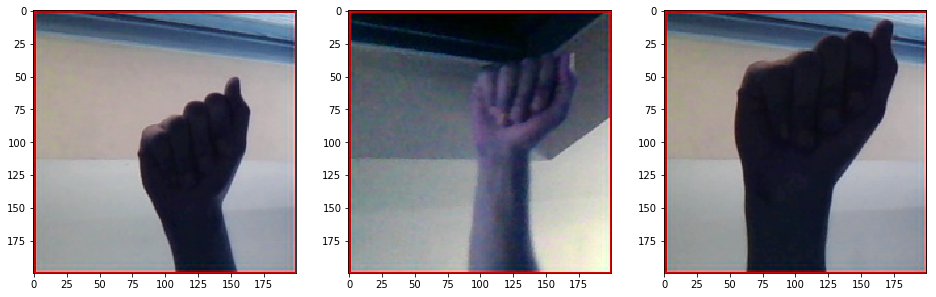

In [6]:
def plot_three_samples(letter):
    print("Samples images for letter " + letter)
    base_path = '../Dataset/asl_alphabet_train/asl_alphabet_train/'
    img_path = base_path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

plot_three_samples('A')

Samples images for letter B


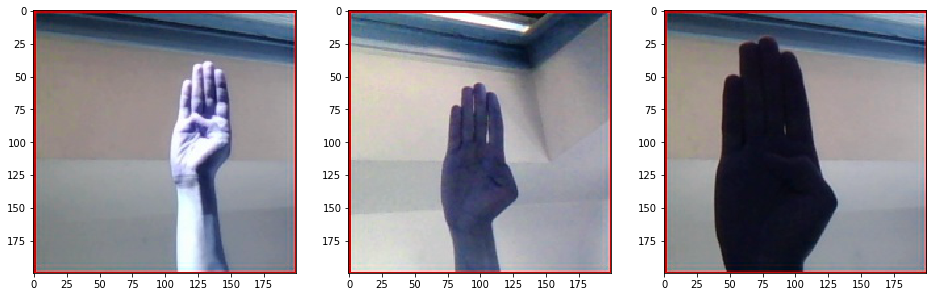

In [7]:
plot_three_samples('B')

# Data Processing Set-Up

In [8]:
data_dir = "../Dataset/asl_alphabet_train/asl_alphabet_train"
target_size = (64, 64)
target_dims = (64, 64, 3) # add channel for RGB
n_classes = 29
val_frac = 0.1
batch_size = 64

data_augmentor = ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=val_frac)

train_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, shuffle=True, subset="training")
val_generator = data_augmentor.flow_from_directory(data_dir, target_size=target_size, batch_size=batch_size, subset="validation")

Found 78300 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


# Model Specification

In [9]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=target_dims))
my_model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
my_model.add(Dropout(0.5))
my_model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
my_model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))
my_model.add(Flatten())
my_model.add(Dropout(0.5))
my_model.add(Dense(512, activation='relu'))
my_model.add(Dense(n_classes, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


# Model Fitting

In [10]:
my_model.fit_generator(train_generator, epochs=5, validation_data=val_generator, steps_per_epoch=train_generator.__len__(), validation_steps=val_generator.__len__() )

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1224/1224 [==============================] - 2627s 2s/step - loss: 15.5384 - acc: 0.0344 - val_loss: 15.5623 - val_acc: 0.0345
Epoch 2/5
1224/1224 [==============================] - 2108s 2s/step - loss: 15.5620 - acc: 0.0345 - val_loss: 15.5623 - val_acc: 0.0345
Epoch 3/5
1224/1224 [==============================] - 1985s 2s/step - loss: 15.5626 - acc: 0.0345 - val_loss: 15.5623 - val_acc: 0.0345
Epoch 4/5
1224/1224 [==============================] - 2015s 2s/step - loss: 15.5626 - acc: 0.0345 - val_loss: 15.5623 - val_acc: 0.0345
Epoch 5/5
1224/1224 [==============================] - 2054s 2s/step - loss: 15.5623 - acc: 0.0345 - val_loss: 15.5623 - val_acc: 0.0345


In [24]:
from keras.preprocessing import image 
import numpy as np
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(64,64))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)
    #return x

img_path = '../Dataset/asl_alphabet_test/asl_alphabet_test/C_test.jpg' 


import os
mypath='../Dataset/asl_alphabet_test/asl_alphabet_test/'
onlyfiles = os.listdir("../Dataset/asl_alphabet_test/asl_alphabet_test/")
for img_path in onlyfiles:
    print(img_path)
    print(my_model.predict(path_to_tensor(mypath+img_path)))
    
    


A_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
B_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
C_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
D_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
E_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
F_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
G_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
H_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
I_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]
J_test.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 